In [1]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns

%matplotlib inline

plt.style.use('default') # haciendo los graficos un poco mas bonitos en matplotlib
#plt.rcParams['figure.figsize'] = (20, 10)

sns.set(style="darkgrid") # seteando tipo de grid en seaborn

pd.options.display.float_format = '{:20,.2f}'.format # suprimimos la notacion cientifica en los outputs

import warnings
warnings.filterwarnings('ignore')

dtypes = {'id': 'int32', 
'titulo': 'object', 
'descripcion': 'object', 
'tipodepropiedad': 'category', 
'direccion': 'object', 
'ciudad': 'object', 
'provincia': 'category', 
'antiguedad': 'float16', 
'habitaciones': 'float16', 
'garages': 'float16', 
'banos': 'float16', 
'metroscubiertos': 'float16', 
'metrostotales': 'float16', 
'idzona': 'float64', 
'lat': 'float64', 
'lng': 'float64', 
'gimnasio': 'float16', 
'usosmultiples': 'float16', 
'piscina': 'float16', 
'escuelascercanas': 'float16', 
'centroscomercialescercanos': 'float16', 
'precio': 'float32', }
#parse_dates = ['fecha'] CONSUME MAS MEMORIA QUE EL TIPO OBJECT. Conviene convertirlo luego de subido el csv.


train = pd.read_csv('C:/Users/Alan Camussi/Desktop/train.csv', dtype = dtypes, low_memory=False, error_bad_lines = False)

In [8]:
train['precio_metro_usd'] = (train['precio']/train['metrostotales']) * 0.051
train_gym = train.loc[(train['gimnasio'] == 1)]
train_gym.provincia.value_counts()

Distrito Federal         4410
Edo. de México           3066
Jalisco                  1344
Nuevo León                966
Querétaro                 927
Yucatán                   668
Puebla                    657
Quintana Roo              518
Guerrero                  457
Morelos                   364
Veracruz                  254
San luis Potosí           192
Guanajuato                144
Hidalgo                   127
Chihuahua                 117
Coahuila                   87
Aguascalientes             86
Durango                    83
Sonora                     83
Tamaulipas                 77
Nayarit                    76
Michoacán                  66
Baja California Norte      41
Tlaxcala                   38
Tabasco                    35
Sinaloa                    33
Chiapas                    33
Colima                     15
Baja California Sur        11
Oaxaca                      9
Campeche                    4
Zacatecas                   1
Name: provincia, dtype: int64

Text(0.5, 1.0, 'Cantidad de propiedades con gimnasio por provincia')

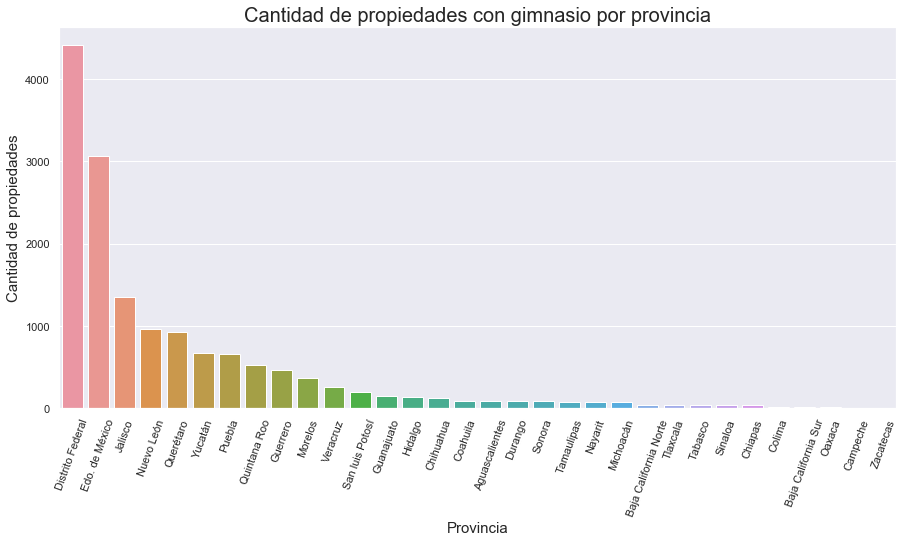

In [9]:
plt.rcParams['figure.figsize'] = (15, 7)
g = sns.countplot(x='provincia', data=train_gym, order=train_gym['provincia'].value_counts().index, orient='v')
g.set_xticklabels(g.get_xticklabels(),rotation=70)
g.set_xlabel("Provincia", fontsize=15)
g.set_ylabel("Cantidad de propiedades", fontsize=15)
g.set_title("Cantidad de propiedades con gimnasio por provincia", fontsize=20)

In [14]:
#train_gym_tipo = train_gym_tipo.loc[(train_gym_tipo['cantidad_propiedades'] > 0)]
train_gym.tipodepropiedad.value_counts()

Apartamento                      7591
Casa                             6105
Casa en condominio               1262
Departamento Compartido            34
Terreno                             1
Oficina comercial                   1
Huerta                              0
Bodega comercial                    0
Casa uso de suelo                   0
Duplex                              0
Edificio                            0
Garage                              0
Hospedaje                           0
Villa                               0
Terreno industrial                  0
Local Comercial                     0
Local en centro comercial           0
Lote                                0
Nave industrial                     0
Otros                               0
Quinta Vacacional                   0
Rancho                              0
Terreno comercial                   0
Inmuebles productivos urbanos       0
Name: tipodepropiedad, dtype: int64

Text(0.5, 1.0, 'Cantidad de propiedades con gimnasio por tipo')

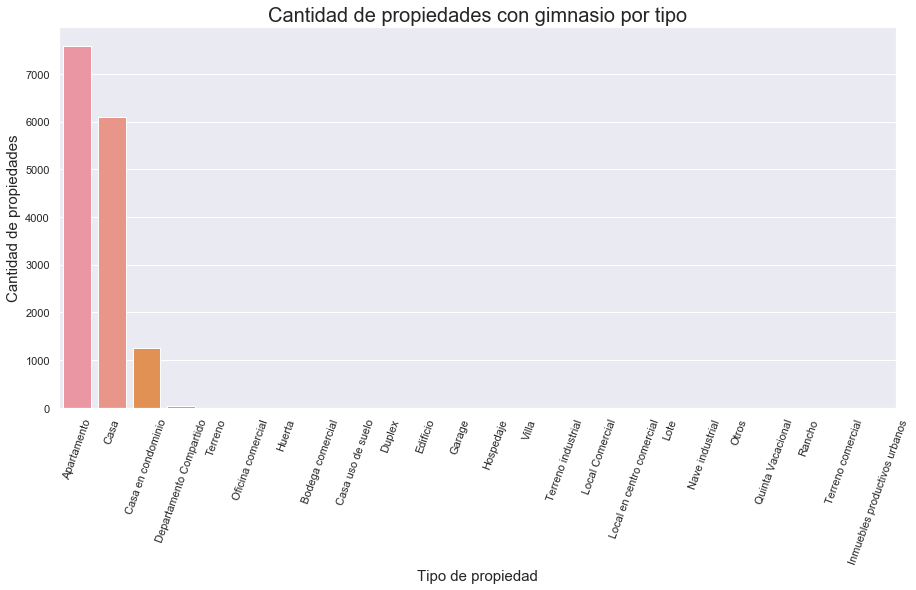

In [16]:
plt.rcParams['figure.figsize'] = (15, 7)
g = sns.countplot(x='tipodepropiedad', data=train_gym, order=train_gym['tipodepropiedad'].value_counts().index, orient='v')
g.set_xticklabels(g.get_xticklabels(),rotation=70)
g.set_xlabel("Tipo de propiedad", fontsize=15)
g.set_ylabel("Cantidad de propiedades", fontsize=15)
g.set_title("Cantidad de propiedades con gimnasio por tipo", fontsize=20)

In [17]:
train_gym_apartamento = train.loc[(train['gimnasio'] == 1) & (train['tipodepropiedad'] == 'Apartamento')]
train_gym_apartamento.provincia.value_counts()

Distrito Federal         3764
Edo. de México           1858
Guerrero                  409
Jalisco                   399
Quintana Roo              294
Nuevo León                267
Querétaro                 198
Puebla                    155
Morelos                    73
Veracruz                   40
Yucatán                    35
Nayarit                    23
San luis Potosí            14
Baja California Norte       9
Chihuahua                   8
Guanajuato                  7
Michoacán                   7
Colima                      6
Aguascalientes              6
Coahuila                    5
Sinaloa                     4
Baja California Sur         3
Hidalgo                     2
Tabasco                     2
Oaxaca                      1
Sonora                      1
Campeche                    1
Durango                     0
Tamaulipas                  0
Chiapas                     0
Tlaxcala                    0
Zacatecas                   0
Name: provincia, dtype: int64

Text(0.5, 1.0, 'Cantidad de Apartamentos con gimnasio por provincia')

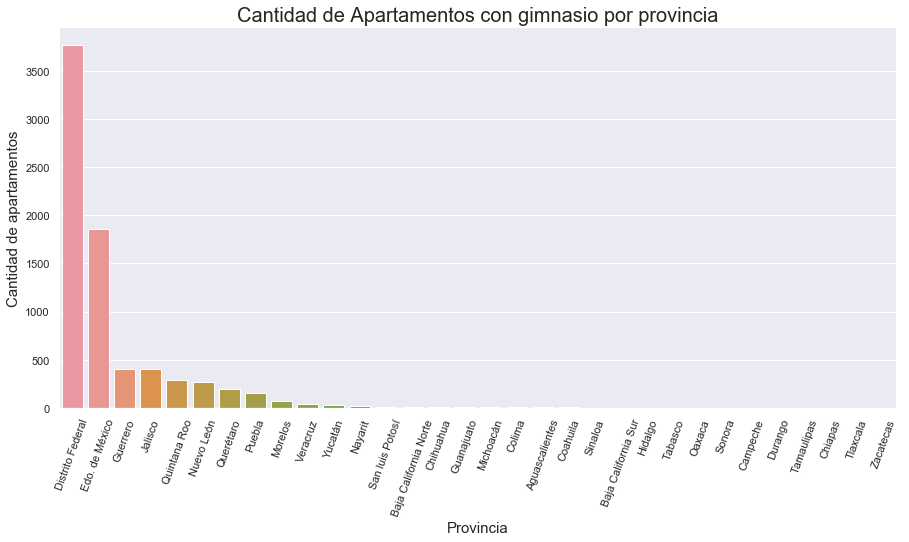

In [20]:
plt.rcParams['figure.figsize'] = (15, 7)
g = sns.countplot(x='provincia', data=train_gym_apartamento, order=train_gym_apartamento.provincia.value_counts().index, orient='v')
g.set_xticklabels(g.get_xticklabels(),rotation=70)
g.set_xlabel("Provincia", fontsize=15)
g.set_ylabel("Cantidad de apartamentos", fontsize=15)
g.set_title("Cantidad de Apartamentos con gimnasio por provincia", fontsize=20)

In [18]:
train_gym_casa = train.loc[(train['gimnasio'] == 1) & (train['tipodepropiedad'] == 'Casa')]
train_gym_casa.provincia.value_counts()

Edo. de México           896
Jalisco                  700
Nuevo León               693
Yucatán                  596
Querétaro                579
Distrito Federal         403
Puebla                   390
Morelos                  243
Veracruz                 213
Quintana Roo             191
San luis Potosí          173
Hidalgo                  121
Guanajuato               119
Chihuahua                109
Durango                   82
Sonora                    81
Coahuila                  81
Tamaulipas                77
Aguascalientes            58
Michoacán                 54
Nayarit                   47
Tlaxcala                  38
Tabasco                   32
Chiapas                   31
Baja California Norte     30
Sinaloa                   29
Guerrero                  17
Baja California Sur        5
Oaxaca                     4
Colima                     4
Campeche                   3
Zacatecas                  1
Name: provincia, dtype: int64

Text(0.5, 1.0, 'Cantidad de Casas con gimnasio por provincia')

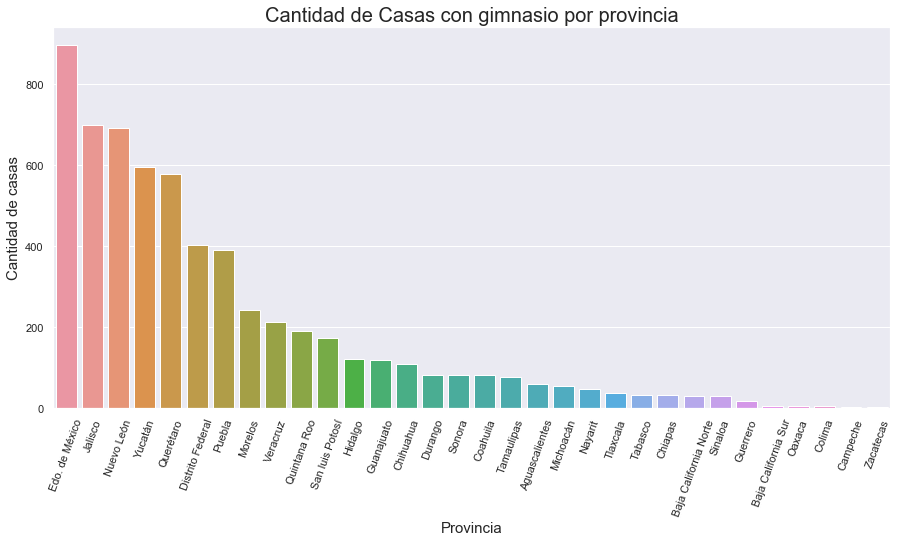

In [21]:
plt.rcParams['figure.figsize'] = (15, 7)
g = sns.countplot(x='provincia', data=train_gym_casa, order=train_gym_casa.provincia.value_counts().index, orient='v')
g.set_xticklabels(g.get_xticklabels(),rotation=70)
g.set_xlabel("Provincia", fontsize=15)
g.set_ylabel("Cantidad de casas", fontsize=15)
g.set_title("Cantidad de Casas con gimnasio por provincia", fontsize=20)

In [22]:
train_gym_apartamento_dfed = train.loc[(train['gimnasio'] == 1) & (train['tipodepropiedad'] == 'Apartamento') 
                                   & (train['provincia'] == 'Distrito Federal')]

train_gym_apartamento_dfed.ciudad.value_counts()

Miguel Hidalgo            854
Alvaro Obregón            844
Cuajimalpa de Morelos     624
Benito Juárez             589
Cuauhtémoc                389
Coyoacán                  132
Tlalpan                    93
Azcapotzalco               86
La Magdalena Contreras     34
Gustavo A. Madero          33
Venustiano Carranza        30
Iztapalapa                 24
Iztacalco                  24
Xochimilco                  3
Tláhuac                     3
otra                        2
Name: ciudad, dtype: int64

Text(0.5, 1.0, 'Cantidad de Apartamentos con gimnasio por ciudad de Distrito Federal')

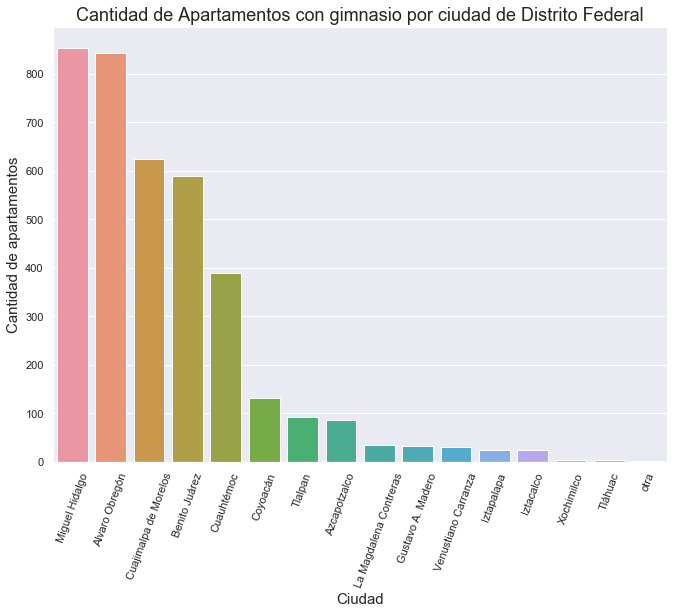

In [31]:
plt.rcParams['figure.figsize'] = (11, 8)
g = sns.countplot(x='ciudad', data=train_gym_apartamento_dfed, order=train_gym_apartamento_dfed.ciudad.value_counts().index, orient='v')
g.set_xticklabels(g.get_xticklabels(),rotation=70)
g.set_xlabel("Ciudad", fontsize=15)
g.set_ylabel("Cantidad de apartamentos", fontsize=15)
g.set_title("Cantidad de Apartamentos con gimnasio por ciudad de Distrito Federal", fontsize=18)

In [32]:
# VARIACION DE PRECIOS PARA PROPIEDADES CON O SIN GYM POR PROVINCIA

train_sin_atributo = train.loc[(train['piscina'] == 0) & (train['escuelascercanas'] == 0)& 
                       (train['centroscomercialescercanos'] == 0) & (train['usosmultiples'] == 0) & 
                       (train['gimnasio'] == 0) & (train['metrostotales'].notnull())]

train_congym= train.loc[(train['piscina'] == 0) & (train['escuelascercanas'] == 0) & 
                       (train['centroscomercialescercanos'] == 0) & (train['usosmultiples'] == 0) & 
                       (train['gimnasio'] == 1) & (train['metrostotales'].notnull())]

train_sin_atributo = train_sin_atributo.groupby('provincia').agg({'precio_metro_usd':'mean'})
train_sin_atributo = train_sin_atributo.reset_index()
train_sin_atributo = train_sin_atributo[['provincia', 'precio_metro_usd']].sort_values(by='precio_metro_usd', ascending=False)
train_sin_atributo = train_sin_atributo.rename(columns={'precio_metro_usd':'precio_metro_usd_prom'})

train_congym = train_congym.groupby('provincia').agg({'precio_metro_usd':'mean'})
train_congym = train_congym.reset_index()
train_congym = train_congym[['provincia', 'precio_metro_usd']].sort_values(by='precio_metro_usd', ascending=False)
train_congym = train_congym.rename(columns={'precio_metro_usd':'precio_metro_usd_prom_gym'})

train_join_consingym = pd.merge(train_sin_atributo, train_congym, how = 'inner', on='provincia')
train_join_consingym['variacion'] = train_join_consingym['precio_metro_usd_prom'] - train_join_consingym['precio_metro_usd_prom_gym']

train_join_consingym.dropna(inplace = True)
train_join_consingym

#ESTO ES MEDIO INEXACTO PORQUE NO SE TIENEN EN CUENTA OTROS FACTORES COMO TIPO DE PROPIEDAD, ANTIGUEDAD, PROVINCIA, CIUDAD
#SE NOTA QUE ES INEXACTO YA QUE HAY VARIACIONES POSITIVAS Y NEGATIVAS

,provincia,precio_metro_usd_prom,precio_metro_usd_prom_gym,variacion
0,Distrito Federal,"1,184.91","1,681.66",-496.75
1,Tabasco,714.54,622.94,91.60
2,Guerrero,714.11,478.12,235.99
3,Edo. de México,711.35,"1,016.09",-304.74
4,Nuevo León,690.50,650.97,39.52
5,Puebla,679.01,866.78,-187.76
6,Jalisco,659.74,"1,090.70",-430.96
7,Quintana Roo,589.35,877.80,-288.45
9,Guanajuato,578.29,480.72,97.57
10,Veracruz,546.38,603.60,-57.22


In [33]:
# Promedio de variacion entre el precio por metro de una propiedad con gym y sin gym 
train_join_consingym['variacion'].mean()

-169.93869

Text(0.5, 1.0, 'Precio con Gimnasio vs Precio sin Gimnasio por Provincia (sin tener en cuenta antiguedad, habitaciones, etc)')

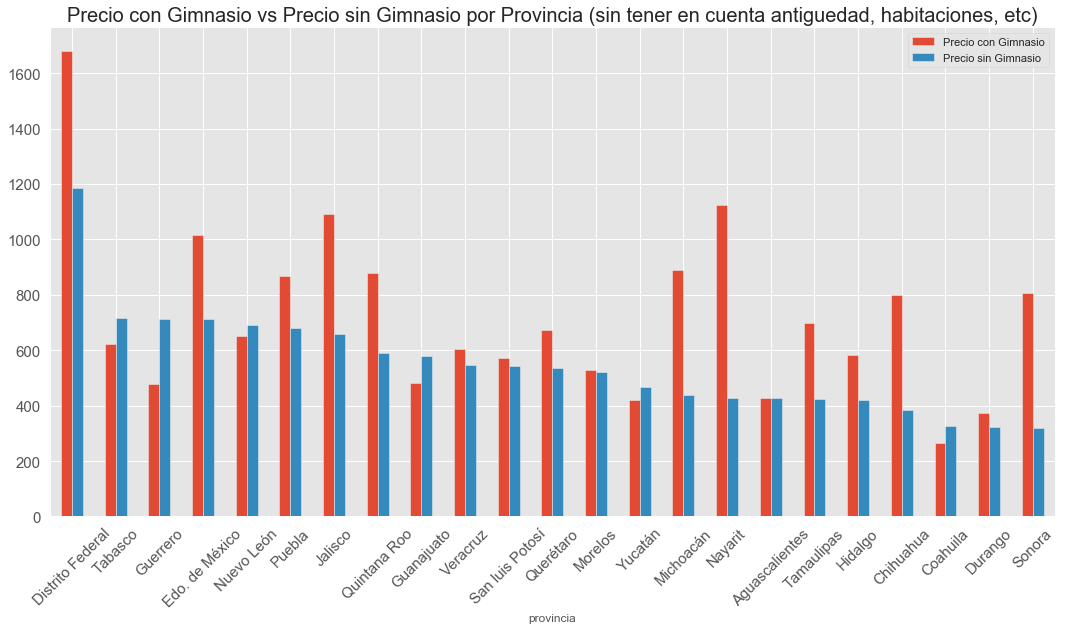

In [34]:
index = train_join_consingym['provincia']
precio_conGym = train_join_consingym['precio_metro_usd_prom_gym'].values.tolist()
precio_sinGym = train_join_consingym['precio_metro_usd_prom'].values.tolist()


df = pd.DataFrame({'Precio con Gimnasio': precio_conGym,
                   'Precio sin Gimnasio': precio_sinGym}, index=index)

plt.rcParams['figure.figsize'] = (18, 9)
plt.style.use('ggplot')
ax = df.plot.bar(rot=45, fontsize = 15)
ax.set_title('Precio con Gimnasio vs Precio sin Gimnasio por Provincia (sin tener en cuenta antiguedad, habitaciones, etc)',fontsize= 20)

In [35]:
# HAGO LO MISMO TENIENDO EN CUENTA EL TIPO DE PROPIEDAD YA QUE ANTES, EL PRECIO DE PROPIEDADES COMO EDIFICIOS, TERRENOS, ETC
# AFECTABA LA VARIACION

train_sin_atributo = train.loc[(train['piscina'] == 0) & (train['escuelascercanas'] == 0)& 
                       (train['centroscomercialescercanos'] == 0) & (train['usosmultiples'] == 0) & 
                       (train['gimnasio'] == 0) & (train['metrostotales'].notnull())
                             & (train['tipodepropiedad'] == 'Apartamento')]

train_congym= train.loc[(train['piscina'] == 0) & (train['escuelascercanas'] == 0) & 
                       (train['centroscomercialescercanos'] == 0) & (train['usosmultiples'] == 0) & 
                       (train['gimnasio'] == 1) & (train['metrostotales'].notnull()) & 
                        (train['tipodepropiedad'] == 'Apartamento')]

train_sin_atributo = train_sin_atributo.groupby('provincia').agg({'precio_metro_usd':'mean'})
train_sin_atributo = train_sin_atributo.reset_index()
train_sin_atributo = train_sin_atributo[['provincia', 'precio_metro_usd']].sort_values(by='precio_metro_usd', ascending=False)
train_sin_atributo = train_sin_atributo.rename(columns={'precio_metro_usd':'precio_metro_usd_prom'})

train_congym = train_congym.groupby('provincia').agg({'precio_metro_usd':'mean'})
train_congym = train_congym.reset_index()
train_congym = train_congym[['provincia', 'precio_metro_usd']].sort_values(by='precio_metro_usd', ascending=False)
train_congym = train_congym.rename(columns={'precio_metro_usd':'precio_metro_usd_prom_gym'})

train_join_consingym = pd.merge(train_sin_atributo, train_congym, how = 'inner', on='provincia')
train_join_consingym['variacion'] = train_join_consingym['precio_metro_usd_prom'] - train_join_consingym['precio_metro_usd_prom_gym']

train_join_consingym.dropna(inplace = True)
train_join_consingym

,provincia,precio_metro_usd_prom,precio_metro_usd_prom_gym,variacion
1,Distrito Federal,"1,294.14","1,807.18",-513.05
2,Nayarit,"1,215.79","1,123.73",92.06
3,Nuevo León,"1,099.31","1,363.14",-263.83
7,Jalisco,893.12,"1,347.62",-454.50
8,Edo. de México,882.63,"1,314.61",-431.98
10,Yucatán,839.05,819.64,19.41
11,Puebla,814.44,"1,215.58",-401.15
12,Chihuahua,745.76,"1,590.00",-844.24
13,Querétaro,700.28,756.73,-56.45
17,Morelos,647.70,768.92,-121.23


In [36]:
# Promedio de variacion entre el precio por metro de un Apartamento con gym y sin gym 
train_join_consingym['variacion'].mean()

-339.94467

Text(0.5, 1.0, 'Precio con Gimnasio vs Precio sin Gimnasio de Apartamento por Provincia (sin tener en cuenta antiguedad, habitaciones, etc)')

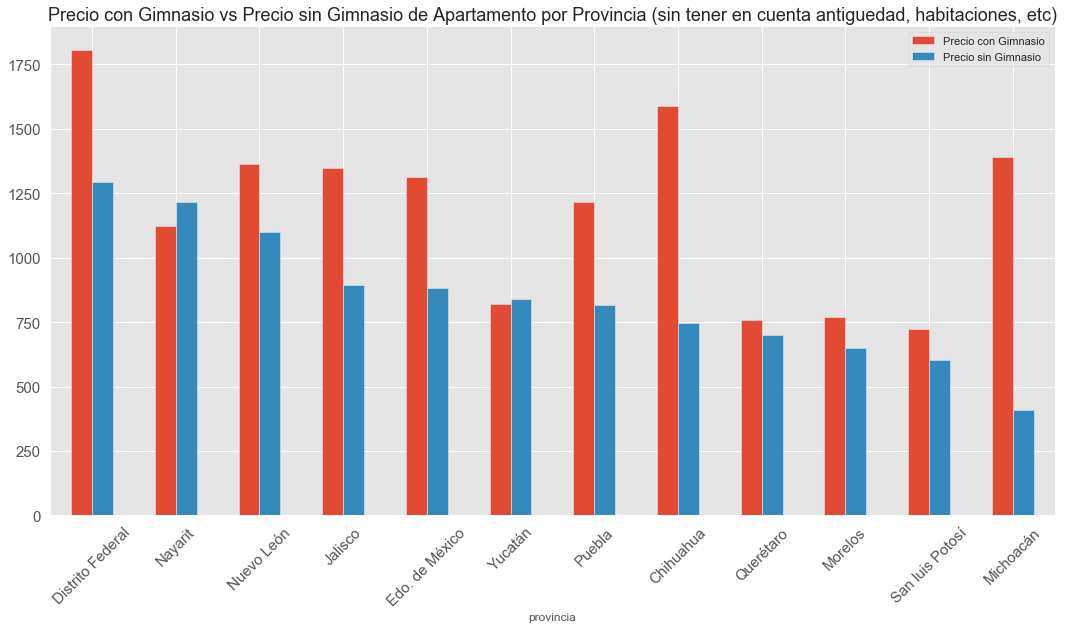

In [37]:
index = train_join_consingym['provincia']
precio_conGym = train_join_consingym['precio_metro_usd_prom_gym'].values.tolist()
precio_sinGym = train_join_consingym['precio_metro_usd_prom'].values.tolist()


df = pd.DataFrame({'Precio con Gimnasio': precio_conGym,
                   'Precio sin Gimnasio': precio_sinGym}, index=index)

plt.rcParams['figure.figsize'] = (18, 9)
plt.style.use('ggplot')
ax = df.plot.bar(rot=45, fontsize = 15)
ax.set_title('Precio con Gimnasio vs Precio sin Gimnasio de Apartamento por Provincia (sin tener en cuenta antiguedad, habitaciones, etc)',fontsize= 18)

In [50]:
train_gym_apartamento_dfed_hid = train.loc[(train['gimnasio'] == 1) & (train['tipodepropiedad'] == 'Apartamento') 
                                   & (train['provincia'] == 'Distrito Federal') & 
                                           (train['ciudad'] == 'Miguel Hidalgo')]

train_gym_apartamento_dfed_hid.antiguedad.value_counts()

 5.00    217
 0.00    184
 1.00     88
 4.00     82
 3.00     74
 2.00     50
10.00     47
20.00     19
 8.00      9
 6.00      9
 7.00      6
12.00      3
11.00      3
 9.00      3
15.00      2
21.00      1
14.00      1
18.00      1
30.00      1
17.00      1
Name: antiguedad, dtype: int64

In [39]:
# TOMO 5 AÑOS DE ANTIGUEDAD YA QUE TENGO MAS INFO AHI
# AVERIGUO QUE PARAMETROS DE GARAGES, HABITACIONES Y BAÑOS ME CONVIENE TOMAR
train_gym_apartamento_dfed_hid = train.loc[(train['gimnasio'] == 1) & (train['tipodepropiedad'] == 'Apartamento') 
                                   & (train['provincia'] == 'Distrito Federal') & 
                                           (train['ciudad'] == 'Miguel Hidalgo') & 
                                           (train['antiguedad'] == 5)]

train_gym_apartamento_dfed_hid_ant = train_gym_apartamento_dfed_hid.groupby(['ciudad', 'habitaciones', 'banos', 
                                                                             'garages']).agg({'id':'count'})

train_gym_apartamento_dfed_hid_ant = train_gym_apartamento_dfed_hid_ant.rename(columns={'id':'cantidad_propiedades'})
train_gym_apartamento_dfed_hid_ant

cantidad_propiedades
ciudad         habitaciones banos garages                      
Miguel Hidalgo 1.00         1.00  1.00                       11
                                  2.00                        2
                            2.00  2.00                        4
               2.00         1.00  0.00                        1
                                  1.00                       10
                                  2.00                        4
                            2.00  1.00                       27
                                  2.00                       70
                                  3.00                        3
                            3.00  2.00                        4
               3.00         1.00  1.00                        3
                                  2.00                        1
                            2.00  1.00                        6
                                  2.00                       33
                                  3.00                        2
                            3.00  2.00                       17
                                  3.00                       11
               4.00         3.00  2.00                        1
                                  3.00                        1
                            4.00  3.00                        1

In [40]:
# FIJO LA PROVINCIA A DISTRITO FEDERAL YA QUE TENGO MAS DATOS AHI QUE EN OTRAS PROVINCIAS

train_sin_atributo = train.loc[(train['piscina'] == 0) & (train['escuelascercanas'] == 0) & 
                        (train['centroscomercialescercanos'] == 0) & (train['usosmultiples'] == 0) & 
                        (train['gimnasio'] == 0) & (train['metrostotales'].notnull()) & 
                        (train['provincia'] == 'Distrito Federal') & 
                        (train['antiguedad'] == 5) & (train['tipodepropiedad'] == 'Apartamento')]

train_congym= train.loc[(train['piscina'] == 0) & (train['escuelascercanas'] == 0) & 
                        (train['centroscomercialescercanos'] == 0) & (train['usosmultiples'] == 0) & 
                        (train['gimnasio'] == 1) & (train['metrostotales'].notnull()) & 
                        (train['provincia'] == 'Distrito Federal') &   (train['tipodepropiedad'] == 'Apartamento')]

train_sin_atributo = train_sin_atributo.groupby('ciudad').agg({'precio_metro_usd':'mean'})
train_sin_atributo = train_sin_atributo.reset_index()
train_sin_atributo = train_sin_atributo[['ciudad', 'precio_metro_usd']].sort_values(by='precio_metro_usd', ascending=False)
train_sin_atributo = train_sin_atributo.rename(columns={'precio_metro_usd':'precio_metro_usd_prom'})

train_congym = train_congym.groupby('ciudad').agg({'precio_metro_usd':'mean'})
train_congym = train_congym.reset_index()
train_congym = train_congym[['ciudad', 'precio_metro_usd']].sort_values(by='precio_metro_usd', ascending=False)
train_congym = train_congym.rename(columns={'precio_metro_usd':'precio_metro_usd_prom_gym'})

train_join_consingym = pd.merge(train_sin_atributo, train_congym, how = 'inner', on='ciudad')

train_join_consingym['variacion'] = train_join_consingym['precio_metro_usd_prom'] - train_join_consingym['precio_metro_usd_prom_gym']

train_join_consingym.dropna(inplace = True)
train_join_consingym

,ciudad,precio_metro_usd_prom,precio_metro_usd_prom_gym,variacion
0,Cuajimalpa de Morelos,"1,613.59","1,960.30",-346.70
1,Miguel Hidalgo,"1,461.30","2,028.87",-567.57
2,Benito Juárez,"1,324.69","1,821.48",-496.79
3,Cuauhtémoc,"1,307.59","1,530.99",-223.40
4,La Magdalena Contreras,"1,198.56","1,162.42",36.14
5,Alvaro Obregón,"1,101.42","1,926.15",-824.73
6,Tlalpan,996.56,"1,710.00",-713.44
7,Coyoacán,904.71,"1,567.11",-662.40
8,Azcapotzalco,791.48,"1,081.28",-289.81
9,Venustiano Carranza,674.93,912.38,-237.45


In [41]:
train_join_consingym['variacion'].mean()

-463.776

Text(0.5, 1.0, 'Precio con Gimnasio vs Precio sin Gimnasio de Apartamento por Ciudad de DF (sin tener en cuenta antiguedad, habitaciones, etc)')

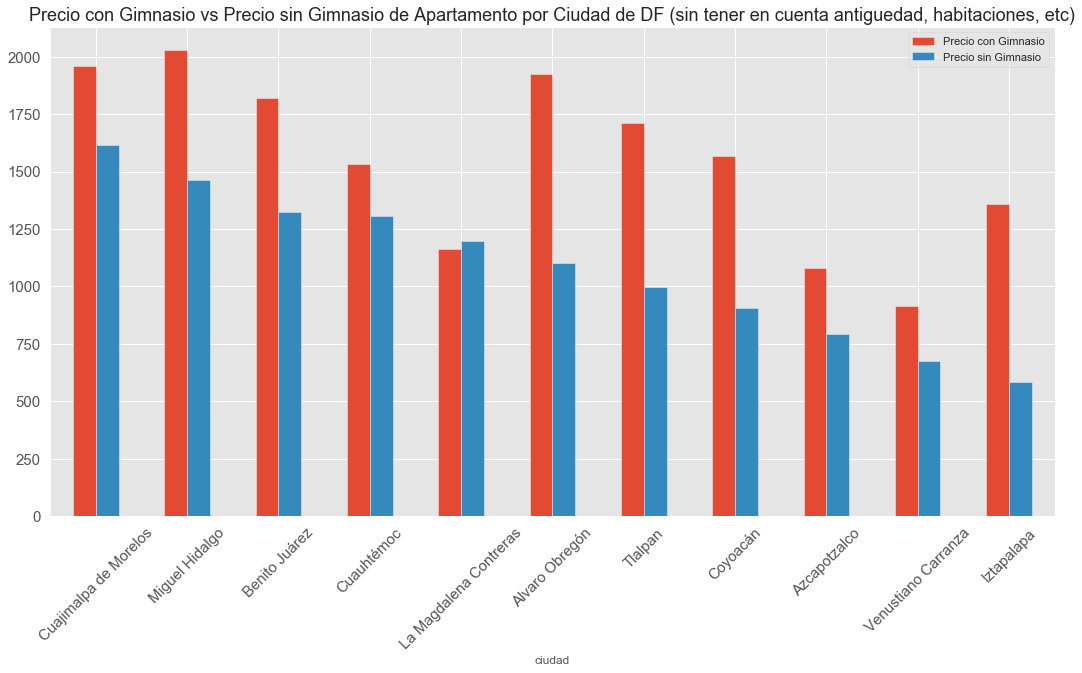

In [42]:
index = train_join_consingym['ciudad']
precio_conGym = train_join_consingym['precio_metro_usd_prom_gym'].values.tolist()
precio_sinGym = train_join_consingym['precio_metro_usd_prom'].values.tolist()

df = pd.DataFrame({'Precio con Gimnasio': precio_conGym,
                   'Precio sin Gimnasio': precio_sinGym}, index=index)

plt.rcParams['figure.figsize'] = (18, 9)
plt.style.use('ggplot')
ax = df.plot.bar(rot=45, fontsize = 15)
ax.set_title('Precio con Gimnasio vs Precio sin Gimnasio de Apartamento por Ciudad de DF (sin tener en cuenta antiguedad, habitaciones, etc)',fontsize= 18)

In [54]:
# ENTONCES COMO ENCUENTRO MAS INFO, TOMO ANTIGUEDAD = 5, HABITACIONES = 2, BAÑOS = 2, GARAGES = 2

train_sin_atributo = train.loc[(train['piscina'] == 0) & (train['escuelascercanas'] == 0) & 
                        (train['centroscomercialescercanos'] == 0) & (train['usosmultiples'] == 0) & 
                        (train['gimnasio'] == 0) & (train['metrostotales'].notnull()) & 
                        (train['provincia'] == 'Distrito Federal') & 
                        (train['antiguedad'] == 5) & (train['tipodepropiedad'] == 'Apartamento') &
                        (train['garages'] == 2)& 
                        (train['banos'] == 2) & 
                        (train['habitaciones'] == 2)]

train_congym= train.loc[(train['piscina'] == 0) & (train['escuelascercanas'] == 0) & 
                        (train['centroscomercialescercanos'] == 0) & (train['usosmultiples'] == 0) & 
                        (train['gimnasio'] == 1) & (train['metrostotales'].notnull()) & 
                        (train['provincia'] == 'Distrito Federal') &   (train['tipodepropiedad'] == 'Apartamento')  &
                        (train['antiguedad'] == 5) & 
                        (train['garages'] == 2)& 
                        (train['banos'] == 2) & 
                        (train['habitaciones'] == 2)]

train_sin_atributo = train_sin_atributo.groupby('ciudad').agg({'precio_metro_usd':'mean'})
train_sin_atributo = train_sin_atributo.reset_index()
train_sin_atributo = train_sin_atributo[['ciudad', 'precio_metro_usd']].sort_values(by='precio_metro_usd', ascending=False)
train_sin_atributo = train_sin_atributo.rename(columns={'precio_metro_usd':'precio_metro_usd_prom'})

train_congym = train_congym.groupby('ciudad').agg({'precio_metro_usd':'mean'})
train_congym = train_congym.reset_index()
train_congym = train_congym[['ciudad', 'precio_metro_usd']].sort_values(by='precio_metro_usd', ascending=False)
train_congym = train_congym.rename(columns={'precio_metro_usd':'precio_metro_usd_prom_gym'})

train_join_consingym = pd.merge(train_sin_atributo, train_congym, how = 'inner', on='ciudad')

train_join_consingym['variacion'] = train_join_consingym['precio_metro_usd_prom'] - train_join_consingym['precio_metro_usd_prom_gym']

train_join_consingym.dropna(inplace = True)
train_join_consingym

,ciudad,precio_metro_usd_prom,precio_metro_usd_prom_gym,variacion
0,Miguel Hidalgo,"2,342.94","2,968.75",-625.81
1,Benito Juárez,"1,538.06","1,586.67",-48.60
2,Alvaro Obregón,"1,388.70","1,754.91",-366.20


In [55]:
# Promedio de variacion entre el precio por metro de un Apartamento en ciudades de Distrito Federal con gym y sin gym 
# y con antiguedad de 5 años, 2 garages, 2 baños y 2 habitaciones
train_join_consingym['variacion'].mean()

-346.8716

Text(0.5, 1.0, 'Precio con Gimnasio vs Precio sin Gimnasio de Apartamento por Ciudad de DF (con 5 años de antiguedad, 2 haitaciones, 2 garages y 2 baños)')

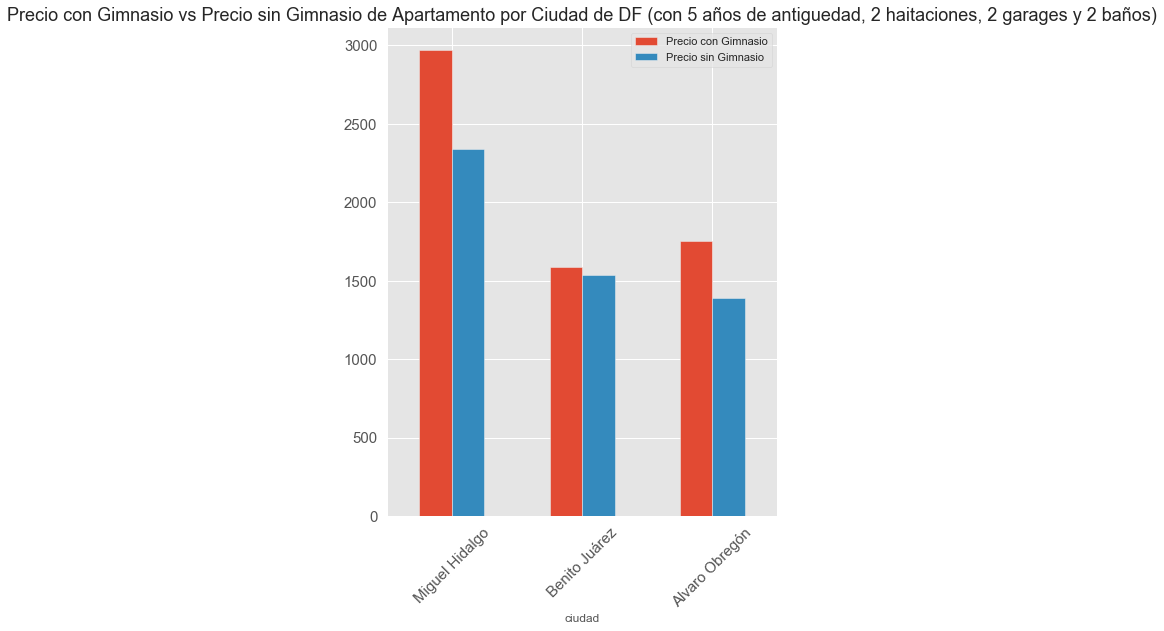

In [56]:
index = train_join_consingym['ciudad']
precio_conGym = train_join_consingym['precio_metro_usd_prom_gym'].values.tolist()
precio_sinGym = train_join_consingym['precio_metro_usd_prom'].values.tolist()

df = pd.DataFrame({'Precio con Gimnasio': precio_conGym,
                   'Precio sin Gimnasio': precio_sinGym}, index=index)

plt.rcParams['figure.figsize'] = (7, 9)
plt.style.use('ggplot')
ax = df.plot.bar(rot=45, fontsize = 15)
ax.set_title('Precio con Gimnasio vs Precio sin Gimnasio de Apartamento por Ciudad de DF (con 5 años de antiguedad, 2 haitaciones, 2 garages y 2 baños)',fontsize= 18)